In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
df = pd.read_excel('./Pistachio_16_Features_Dataset.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


### Applying Normalizer on the numerical columns

In [3]:
norm = Normalizer()


x_train,x_test = train_test_split(df,test_size=0.2)

y_train = x_train['Class'].copy()

x_train = x_train.drop('Class',axis=1).copy()
x_train = pd.DataFrame(norm.fit_transform(x_train),columns=norm.get_feature_names_out())


y_test = x_test['Class'].copy()

x_test = x_test.drop('Class',axis=1).copy()
x_test = pd.DataFrame(norm.fit_transform(x_test),columns=norm.get_feature_names_out())


In [4]:
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Default Hyperparameters Decision Tree Visualization

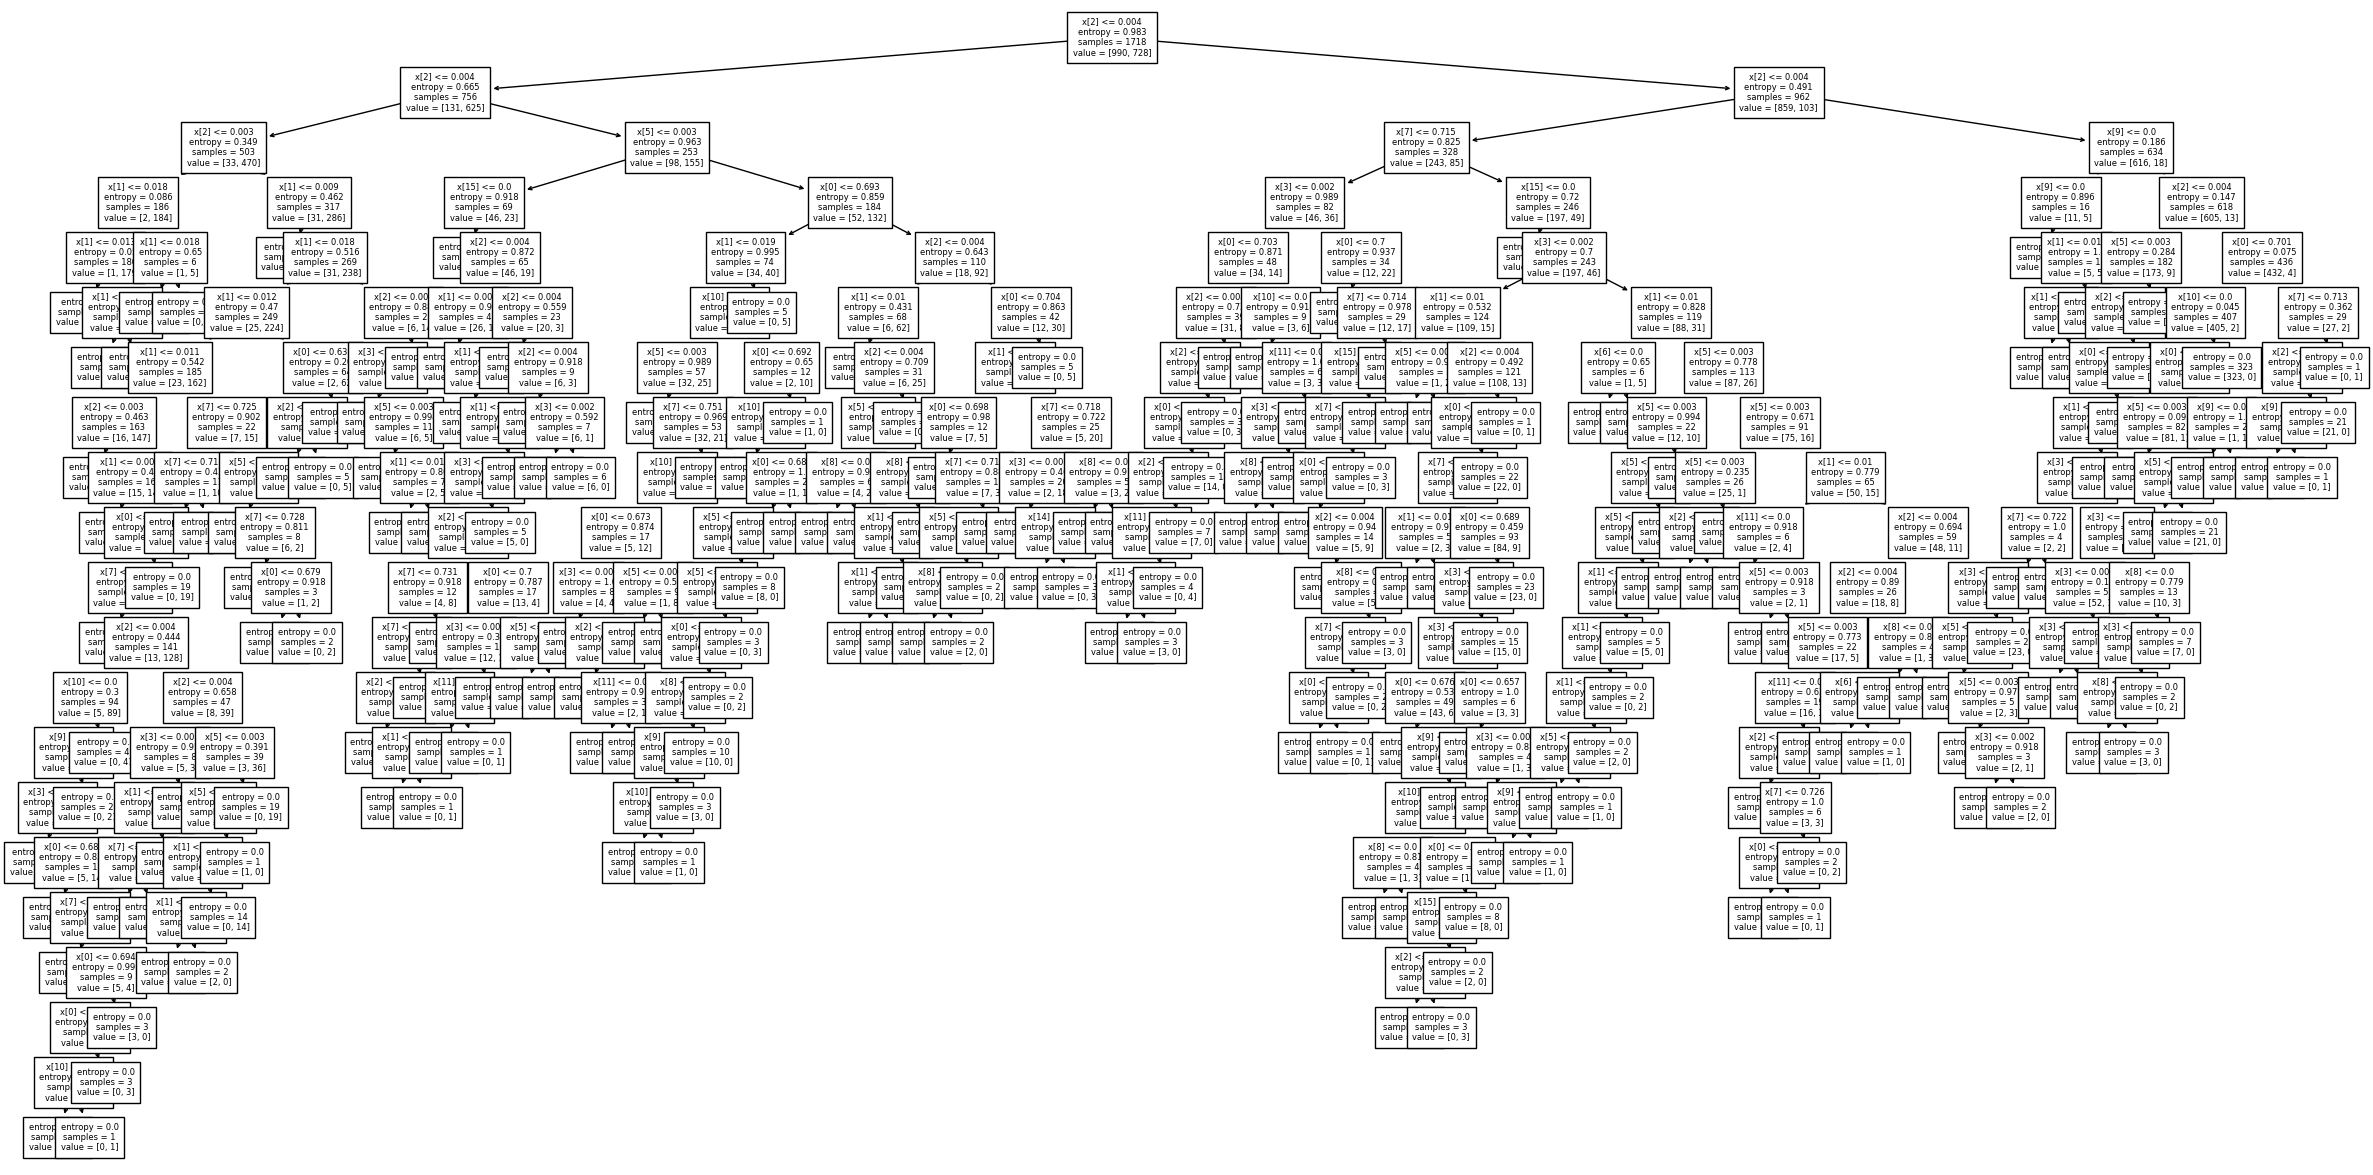

In [5]:
figura,eixos = plt.subplots(nrows=1,ncols=1,figsize=(30,15))
tree.plot_tree(dt_clf,fontsize=6);

In [6]:
y_predictions = dt_clf.predict(x_test)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

DecisionTreeClassifier
param_distrs = {
                'max_depth':randint(low=20,high=25),
                'min_samples_split':randint(low=30,high=50),
                'max_leaf_nodes':randint(low=2,high=4),
                }
rnd_dec = RandomizedSearchCV(dt_clf,param_distrs,n_iter=10,cv=3)

rnd_dec.fit(x_train,y_train);
rnd_dec.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=23, max_leaf_nodes=3,
                       min_samples_split=39)

In [8]:
y_pred_2 = rnd_dec.predict(x_test)

### Randomized Search Score

In [9]:
print(classification_report(y_test,y_pred_2))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.88      0.84      0.86       242
   Siit_Pistachio       0.80      0.85      0.82       188

         accuracy                           0.84       430
        macro avg       0.84      0.84      0.84       430
     weighted avg       0.84      0.84      0.84       430



### Default Hyperparameters Score

In [10]:
print(classification_report(y_test,y_predictions))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.82      0.87      0.85       242
   Siit_Pistachio       0.82      0.76      0.79       188

         accuracy                           0.82       430
        macro avg       0.82      0.81      0.82       430
     weighted avg       0.82      0.82      0.82       430



### Importance of each feature bar plot

<Axes: >

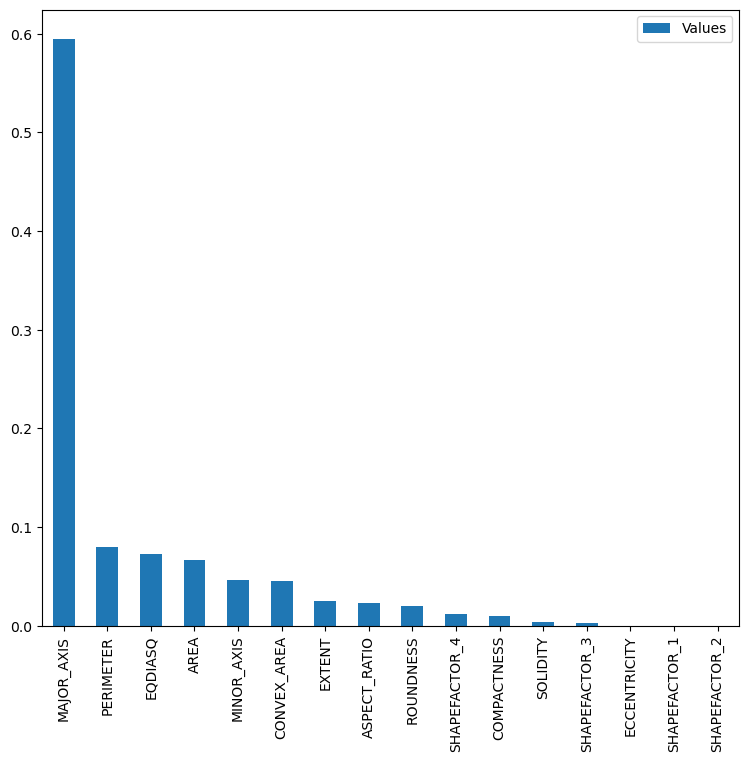

In [11]:
feat_importance = pd.DataFrame(dt_clf.feature_importances_,index=x_test.columns)
feat_importance.columns = ['Values']
feat_importance.sort_values(by='Values',ascending=False).plot(kind='bar',figsize=(9,8))

### Correlation heatmap

C:\Users\Máquina - LPO\AppData\Local\Temp\ipykernel_2292\881351215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

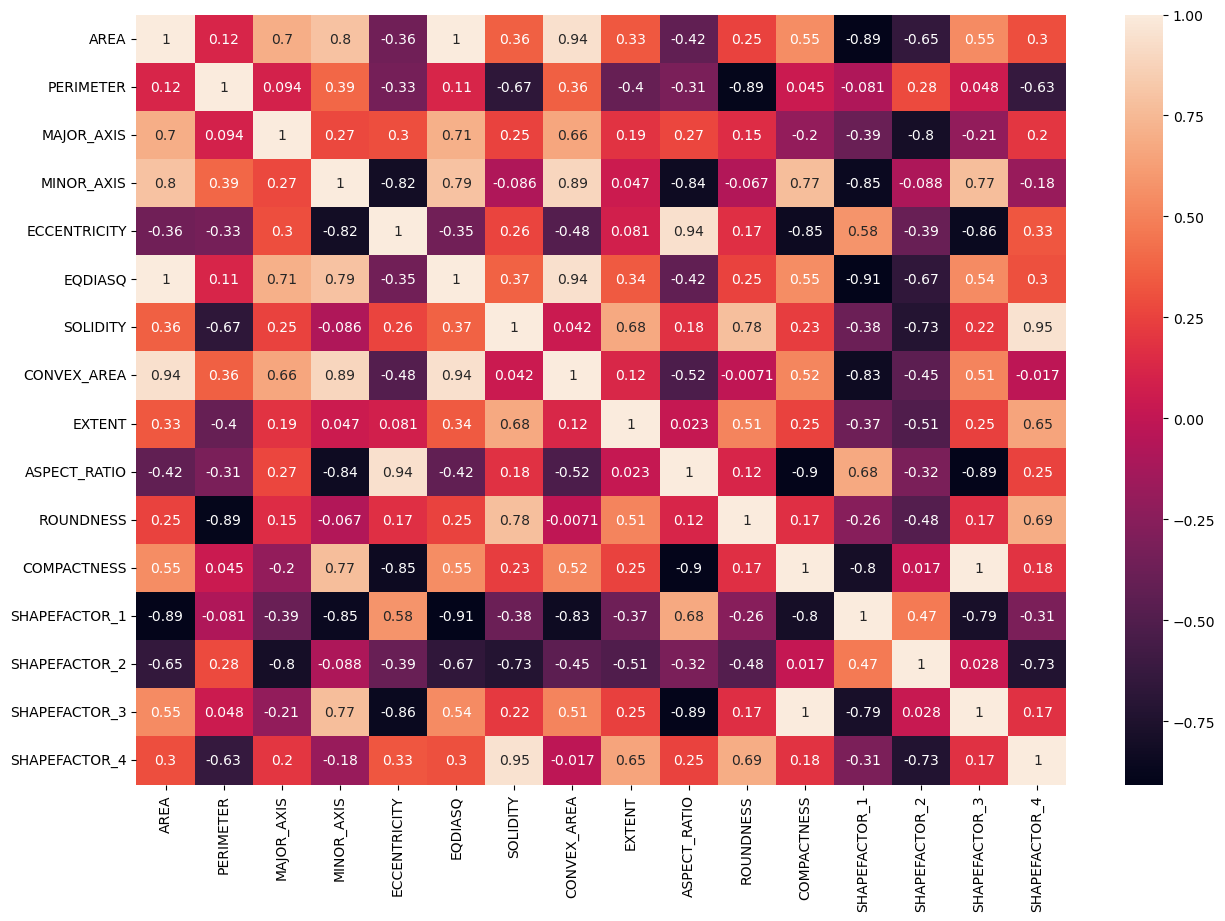

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)